In [7]:
!pip install tensorflow

  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)
     -------------------------------------- 24.4/24.4 MB 969.1 kB/s eta 0:00:00
     ------------------------------------ 440.7/440.7 kB 706.8 kB/s eta 0:00:00
     -------------------------------------- 57.5/57.5 kB 215.7 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 151.4 kB/s eta 0:00:00
  Using cached protobuf-4.23.2-cp310-abi3-win_amd64.whl (422 kB)
     ---------------------------------------- 4.1/4.1 MB 328.5 kB/s eta 0:00:00
     ------------------------------------ 126.5/126.5 kB 240.3 kB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     -------------------------------------- 65.5/65.5 kB 708.3 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 973.7 kB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 357.4 kB/s eta 0:00:00
  Using ca

In [1]:

import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import utils
import matplotlib.pyplot as plt
np.random.seed(1671) # for reproducibility
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

In [2]:
NB_CLASSES = 10
#X_train = X_train.reshape(X_train.shape[0],-1)
print(X_train.shape)
#X_test = X_test.reshape(X_test.shape[0],-1)
print(X_test.shape)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

NB_FEATURES = X_train.shape[1]
X_train /= 255
X_test /= 255
Y_train = utils.to_categorical(y_train, NB_CLASSES)
Y_test = utils.to_categorical(y_test, NB_CLASSES)

(60000, 28, 28)
(10000, 28, 28)


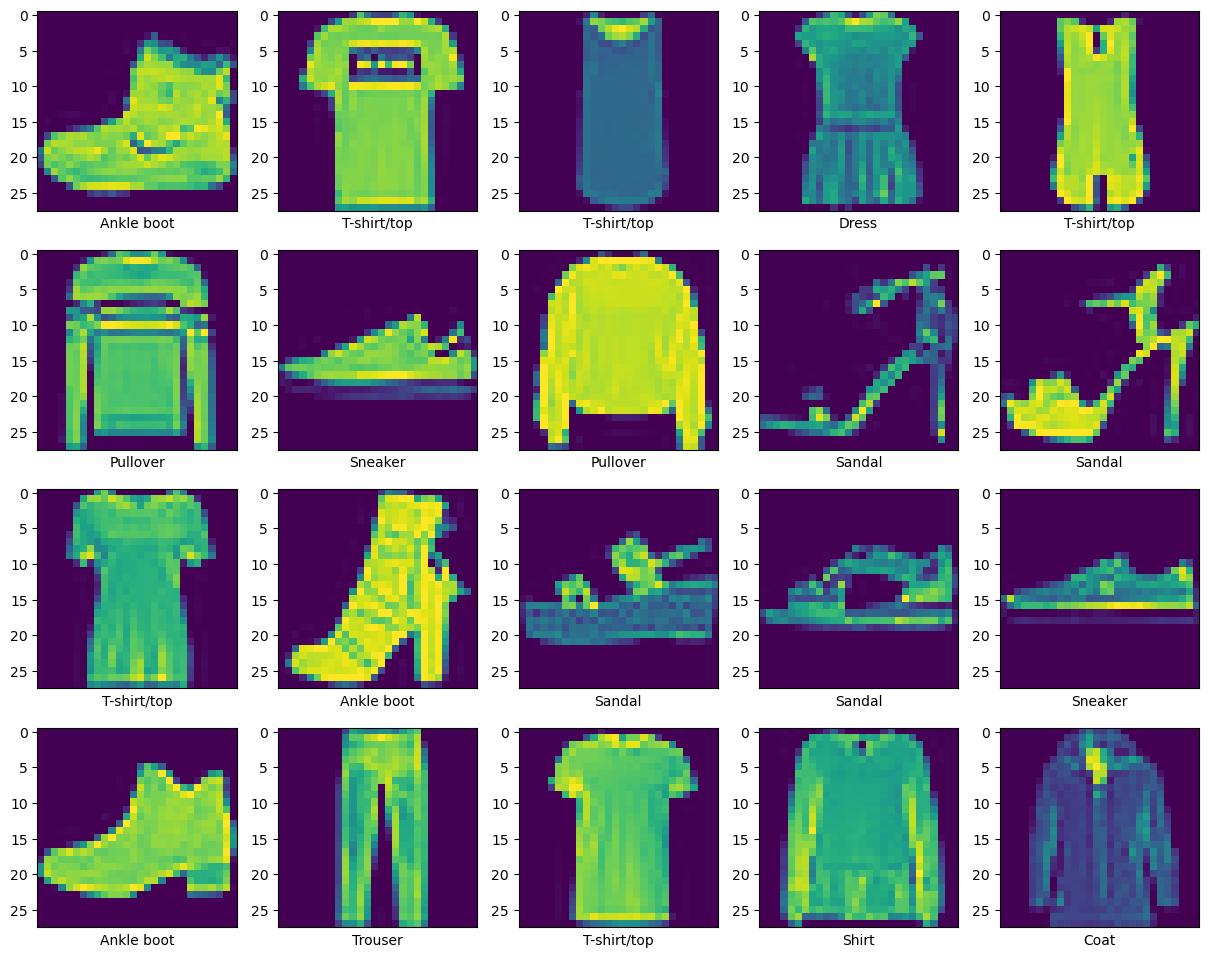

In [3]:
labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.figure(figsize = (15, 15))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.xlabel(labels[y_train[i]])
    plt.imshow(X_train[i].reshape(28, 28))

In [4]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
DROPOUT = 0.3
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape = X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', input_shape = X_train.shape[1:]))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,Activation('relu')))
model.add(Dropout(0.5))
model.add(Dense(64,Activation('relu')))

model.add(Dropout(0.5))
model.add(Dense(10,Activation('softmax')))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                        

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 64, epochs = 50, validation_data = (X_test, y_test))

Epoch 1/50
938/938 [==============================] - 98s 103ms/step - loss: 0.8371 - accuracy: 0.6950 - val_loss: 0.4777 - val_accuracy: 0.8239
Epoch 2/50
938/938 [==============================] - 89s 95ms/step - loss: 0.5069 - accuracy: 0.8184 - val_loss: 0.3701 - val_accuracy: 0.8651
Epoch 3/50
938/938 [==============================] - 87s 93ms/step - loss: 0.4292 - accuracy: 0.8525 - val_loss: 0.3258 - val_accuracy: 0.8763
Epoch 4/50
938/938 [==============================] - 86s 92ms/step - loss: 0.3820 - accuracy: 0.8704 - val_loss: 0.3001 - val_accuracy: 0.8922
Epoch 5/50
938/938 [==============================] - 88s 94ms/step - loss: 0.3526 - accuracy: 0.8809 - val_loss: 0.2779 - val_accuracy: 0.9010
Epoch 6/50
938/938 [==============================] - 83s 89ms/step - loss: 0.3354 - accuracy: 0.8873 - val_loss: 0.2781 - val_accuracy: 0.9037
Epoch 7/50
938/938 [==============================] - 84s 90ms/step - loss: 0.3187 - accuracy: 0.8913 - val_loss: 0.2585 - val_accuracy

In [6]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.2346 - accuracy: 0.9266
Test score: 0.23455213010311127
Test accuracy: 0.9265999794006348


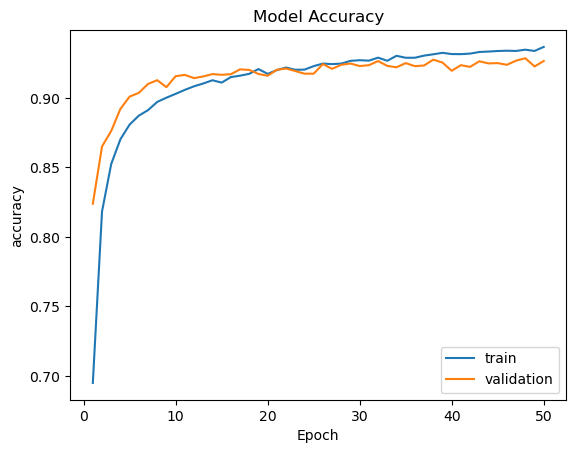

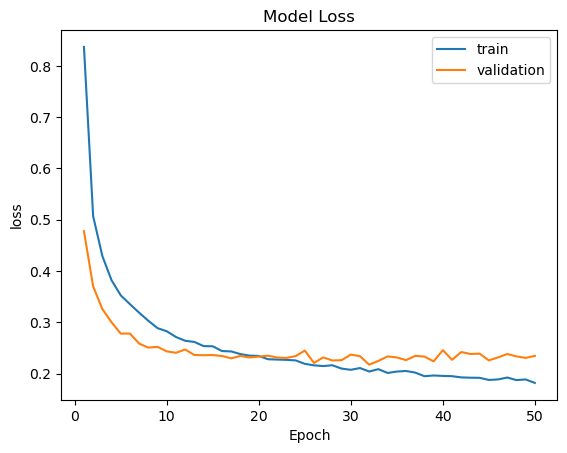

In [7]:
plt.title('Model Accuracy')
plt.plot( range(1, 51),history.history['accuracy'])
plt.plot( range(1, 51),history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(labels=['train','validation'])
plt.show()

plt.title('Model Loss')
plt.plot(range(1, 51),history.history['loss'])
plt.plot(range(1, 51),history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(labels=['train','validation'])
plt.show()

1/1 [==============================] - 0s 24ms/step
Predicted class: 4


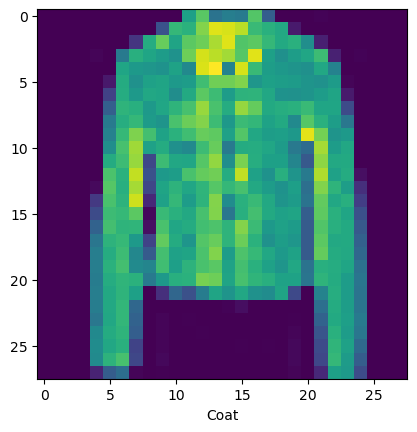

In [30]:
image_1 = X_test[10]
image = np.expand_dims(image_1, axis=0)

predictions = model.predict(image)

predicted_class = np.argmax(predictions[0])

print(f"Predicted class: {predicted_class}")


plt.xlabel(labels[predicted_class])
plt.imshow(image_1.reshape(28, 28))